<a href="https://colab.research.google.com/github/ShubhamShaswat/TCS-Humain/blob/master/ethnicity_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tqdm import tqdm
import cv2
import PIL
import requests

#import face_recognition
import json
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout,Conv2D, MaxPool2D, Activation,  BatchNormalization


#define the model for training

def model():
  
  X_input = Input((48,48,3))
  
  #Conv2D with 32 filtres
  X = Conv2D(filters=32,kernel_size=(5,5),padding='same')(X_input)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
   #Conv2D with 32 filtres
  X = Conv2D(filters=32,kernel_size=(5,5),padding='same')(X)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
  #maxpool 2d pool size=2,2
  X = MaxPool2D(pool_size=(2,2))(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  
   #Conv2D with 64 filtres
  X = Conv2D(filters=64,kernel_size=(3,3),padding='same')(X_input)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
   #Conv2D with 64 filtres
  X = Conv2D(filters=64,kernel_size=(3,3),padding='same')(X)
  
  #Activation layer relu
  X = Activation('relu')(X)
  
  #maxpool 2d pool size=2,2
  X = MaxPool2D(pool_size=(2,2),strides=(2,2))(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  #flatten
  X = Flatten()(X)
  
  #Dense Layer
  X = Dense(256,activation='relu')(X)
  
  #Dropout layer
  X = Dropout(0.5)(X)
  
  #output layer 
  X = Dense(5,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  
  return model


In [0]:
#define a callbacks


class myCallback(tf.keras.callbacks.Callback):
          def on_epoch_end(self, epoch, logs={}):
                if(logs.get('acc') > 0.90):
                    print("\nReached 90% accuracy so cancelling training!")
                    self.model.stop_training = True


In [0]:
#calling the myCallback class
callback=myCallback()

In [5]:
#upload all necessary files
!ls

20180402-114759  crop_images.zip     facenet_keras.h5  sample_data
crop_images	 face_dataset_1.csv  model.png


In [0]:
#read csv file

train_data=pd.read_csv('face_dataset_1.csv')

train_data['id']=train_data['id'].astype(np.unicode_)
train_data['race'] = train_data['race'].astype(np.unicode_)

train_data['id']+='.jpg'

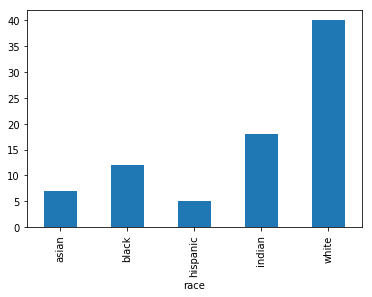

In [7]:
#let look at some stats

train_data.groupby('race')['id'].count().plot.bar()

In [11]:
#using data augmentation to increase number training dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.0,
                                rotation_range=30,
                                shear_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True
                                )
                                

train_data=train_datagen.flow_from_dataframe(train_data,directory='crop_images', x_col='id', y_col='race', target_size=(48, 48),  class_mode='categorical')


Found 82 validated image filenames belonging to 5 classes.


In [12]:
#calsses and their indices
print(train_data.class_indices)


{'asian': 0, 'black': 1, 'hispanic': 2, 'indian': 3, 'white': 4}


In [0]:
#calling the model
model=model()

In [15]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
activation_3 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
__________

In [16]:
#compiling the model

from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss= "categorical_crossentropy", metrics=["acc"])

W0827 15:47:52.288370 140690524698496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 15:47:52.296090 140690524698496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
#train the model
history=model.fit_generator(train_data, steps_per_epoch=train_data.samples//32,epochs=500,callbacks=[callback])


W0827 15:48:32.073879 140690524698496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
2/2 [==============================] - 2s 1s/step - loss: 4.8348 - acc: 0.3281
Epoch 2/500
2/2 [==============================] - 0s 69ms/step - loss: 8.4650 - acc: 0.4748
Epoch 3/500
2/2 [==============================] - 0s 34ms/step - loss: 8.4650 - acc: 0.4748
Epoch 4/500
2/2 [==============================] - 0s 32ms/step - loss: 6.7900 - acc: 0.4375
Epoch 5/500
2/2 [==============================] - 0s 30ms/step - loss: 1.7967 - acc: 0.2131
Epoch 6/500
2/2 [==============================] - 0s 28ms/step - loss: 1.4997 - acc: 0.3040
Epoch 7/500
2/2 [==============================] - 0s 32ms/step - loss: 1.2941 - acc: 0.5156
Epoch 8/500
2/2 [==============================] - 0s 30ms/step - loss: 1.5796 - acc: 0.4586
Epoch 9/500
2/2 [==============================] - 0s 27ms/step - loss: 1.3686 - acc: 0.4406
Epoch 10/500
2/2 [==============================] - 0s 65ms/step - loss: 1.4044 - acc: 0.4688
Epoch 11/500
2/2 [==============================] - 0s 47ms/step - loss

dict_keys(['loss', 'acc'])


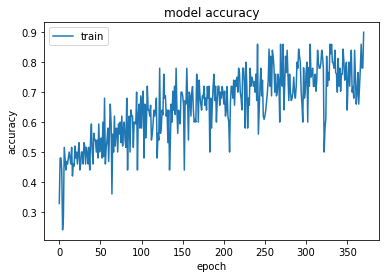

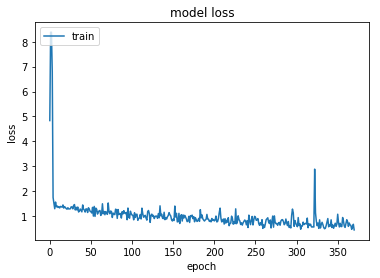

In [18]:
#plot model accuracy with epochs
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

[[0. 0. 0. 0. 1.]]


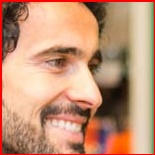

In [19]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


#predictions pipeline


image_name='crop_images/202c1.jpg'
# load an image from file
image = load_img(image_name, target_size=(48, 48))


# convert the image pixels to a numpy array
image = img_to_array(image)
#reshape image
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#print predictions
print(model.predict(image))

#show image
cv2_imshow(cv2.imread(image_name))